In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

# Qiskit Runtime

![Alt text](rect4-5.png "a title")

# Sampler

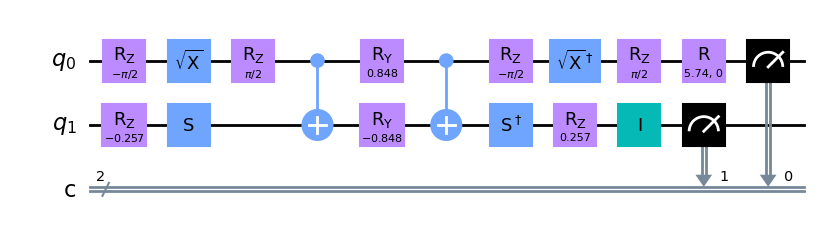

In [14]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0, measure=True).decompose(reps=1)
display(circuit.draw("mpl"))

In [15]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [16]:
job = sampler.run(circuit)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: 5720dc52-92e3-445e-90de-fb757801ebfc
>>> Job Status: JobStatus.RUNNING


In [18]:
result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")



>>> SamplerResult(quasi_dists=[{0: 0.4059100518225088, 1: 0.0320881623296046, 2: 0.0411727809637867, 3: 0.5208290048841}], metadata=[{}])
  > Quasi-probability distribution: {0: 0.4059100518225088, 1: 0.0320881623296046, 2: 0.0411727809637867, 3: 0.5208290048841}


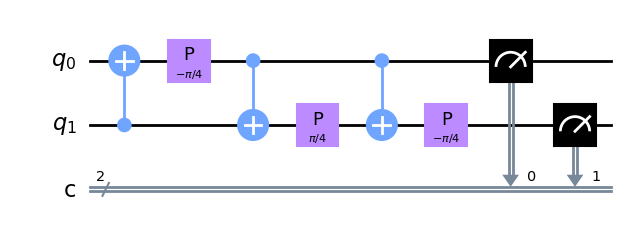

>>> Quasi-probability distribution: {0: 1.0}


In [19]:
circuit = random_circuit(2, 2, seed=1, measure=True).decompose(reps=1)

job = sampler.run(circuit)
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Quasi-probability distribution: {result.quasi_dists[0]}")



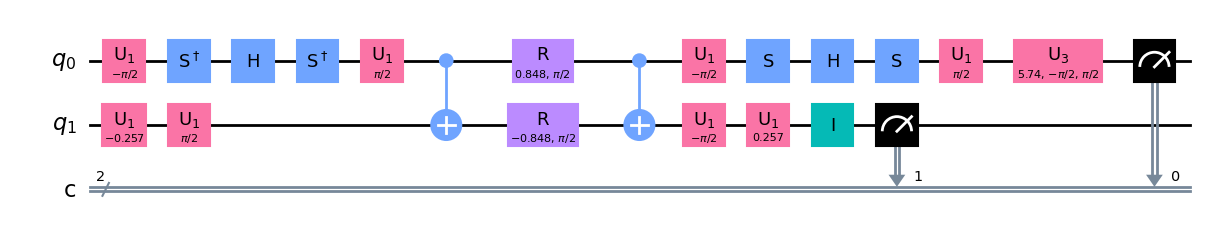

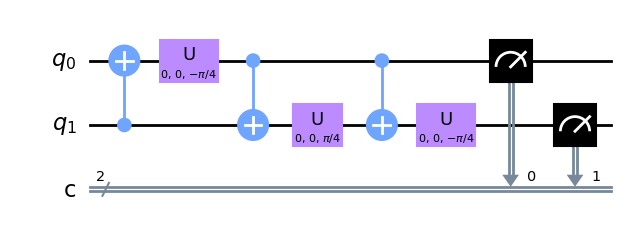

>>> Quasi-probability distribution: [{0: 0.4059100518225088, 1: 0.0320881623296046, 2: 0.0411727809637867, 3: 0.5208290048841}, {0: 1.0}]


In [21]:
circuits = (
    random_circuit(2, 2, seed=0, measure=True).decompose(reps=1),
    random_circuit(2, 2, seed=1, measure=True).decompose(reps=1),
)

job = sampler.run(circuits)
result = job.result()

[display(cir.decompose().draw("mpl")) for cir in circuits]
print(f">>> Quasi-probability distribution: {result.quasi_dists}")

# Estimator

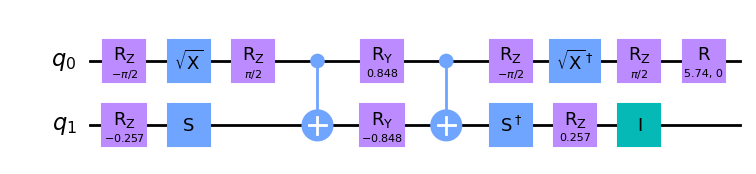

In [22]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0).decompose(reps=1)
display(circuit.draw("mpl"))

In [28]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp("IZ")
print(f">>> Observable: {observable.paulis}")

>>> Observable: ['IZ']


In [29]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [30]:
job = estimator.run(circuit, observable)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: 2f07d319-f7a4-4880-86f2-03da60b2924e
>>> Job Status: JobStatus.RUNNING


In [31]:
result = job.result()
print(f">>> {result}")
print(f"  > Expectation value: {result.values[0]}")

>>> EstimatorResult(values=array([-0.10583433]), metadata=[{}])
  > Expectation value: -0.10583433442740914


$Z \otimes I$

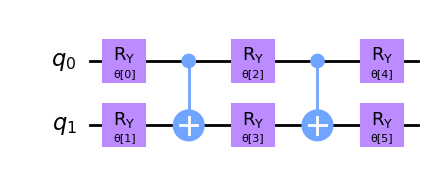

>>> Observable: ['ZZ']
>>> Parameter values: [0, 1, 2, 3, 4, 5]
>>> Expectation value: 0.5836832752030983


In [33]:
from qiskit.circuit.library import RealAmplitudes

circuit = RealAmplitudes(num_qubits=2, reps=2).decompose(reps=1)
observable = SparsePauliOp("ZZ")
parameter_values = [0, 1, 2, 3, 4, 5]

job = estimator.run(circuit, observable, parameter_values)
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Observable: {observable.paulis}")
print(f">>> Parameter values: {parameter_values}")
print(f">>> Expectation value: {result.values[0]}")

# Código: BJ-912-HP